# Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load Train Images

In [11]:
images = "images/train"

In [12]:
folders = os.listdir(images)
print(folders)

['control', 'pd']


In [13]:
image_data= []
labels = []

In [14]:
label_dict = {
    'control':0,
    'pd':1
}

In [15]:
from keras.preprocessing import image

for ix in folders:
  path = os.path.join(images,ix)
  for im in os.listdir(path):
    img = image.load_img(os.path.join(path,im),target_size=((512,512)))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(label_dict[ix])

In [ ]:
print(len(image_data),len(labels))

1040 1040


In [ ]:
combined = list(zip(image_data,labels))
image_data[:],labels[:] = zip(*combined)

In [ ]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
x_train = np.array(image_data)
y_train = np.array(labels)

print(x_train.shape,y_train.shape)

(1040, 512, 512, 3) (1040,)


In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(1040, 512, 512, 3) (1040, 2)


# Transfer Learning With EfficientNet

In [2]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7

In [4]:
model = EfficientNetB7(include_top = False, weights = 'imagenet',input_shape = (512,512,3))

In [5]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 512, 512, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 512, 512, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 513, 513, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [6]:
for ix in range(len(model.layers)):
    print(ix,model.layers[ix])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x00000256799DACA0>
1 <tensorflow.python.keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x0000025679A097C0>
2 <tensorflow.python.keras.layers.preprocessing.normalization.Normalization object at 0x0000025679A09BE0>
3 <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x0000025679A09FA0>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000025679A91BE0>
5 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x0000025679AE9580>
6 <tensorflow.python.keras.layers.core.Activation object at 0x0000025679B183D0>
7 <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x0000025679B186A0>
8 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x0000025679B36A00>
9 <tensorflow.python.keras.layers.core.Activation object at 0x0000025679B61190>
10 <tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D ob

234 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000025679B18940>
235 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002567BFA1190>
236 <tensorflow.python.keras.layers.core.Activation object at 0x000002567AFC79A0>


In [7]:
for layer in model.layers[:233]:
    layer.trainable = False
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

block4a_bn (BatchNormalization) (None, 32, 32, 240)  960         block4a_dwconv[0][0]             
__________________________________________________________________________________________________
block4a_activation (Activation) (None, 32, 32, 240)  0           block4a_bn[0][0]                 
__________________________________________________________________________________________________
block4a_se_squeeze (GlobalAvera (None, 240)          0           block4a_activation[0][0]         
__________________________________________________________________________________________________
block4a_se_reshape (Reshape)    (None, 1, 1, 240)    0           block4a_se_squeeze[0][0]         
__________________________________________________________________________________________________
block4a_se_reduce (Conv2D)      (None, 1, 1, 10)     2410        block4a_se_reshape[0][0]         
__________________________________________________________________________________________________
block4a_se

In [8]:
av1 = Flatten()(model.output)
fc1 = Dense(256,activation='relu',kernel_regularizer= l2(0.01),input_dim=256)(av1)
d1  = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu',kernel_regularizer= l2(0.01),input_dim=128)(d1)
d2  = Dropout(0.5)(fc2)
fc3 = Dense(2,activation = 'sigmoid')(d2)


model_efficient = Model(model.input,fc3)
model_efficient.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 512, 512, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 512, 512, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 513, 513, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [9]:
adam = Adam(learning_rate=0.00001)
model_efficient.compile(loss='binary_crossentropy',optimizer = adam , metrics=['accuracy'])

In [10]:
filepath="parkinsons_detection_resnet50.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=2)
callbacks_list = [checkpoint]

In [ ]:
hist = model_efficient.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 20,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/20
30/30 [==============================] - 29s 742ms/step - loss: 7.5180 - accuracy: 0.6816 - val_loss: 6.9191 - val_accuracy: 0.4904

Epoch 00001: val_loss improved from inf to 6.91910, saving model to parkinsons_detection_resnet50.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
30/30 [==============================] - 20s 648ms/step - loss: 6.3958 - accuracy: 0.8397 - val_loss: 6.3788 - val_accuracy: 0.5577

Epoch 00002: val_loss improved from 6.91910 to 6.37875, saving model to parkinsons_detection_resnet50.hdf5
Epoch 3/20
30/30 [==============================] - 20s 671ms/step - loss: 5.7789 - accuracy: 0.9231 - val_loss: 5.5670 - val_accuracy: 0.9327

Epoch 00003: val_loss improved from 6.37875 to 5.56699, saving model to parkinsons_detection_resnet50.hdf5
Epoch 4/20
30/30 [==============================] - 19s 631ms/step - loss: 5.3518 - accuracy: 0.9594 - val_loss: 5.3940 - val_accuracy: 0.7885

Epoch 00004: val_loss improved from 5.56699 to 5.39401, saving model to parkinsons_detection_resnet50.hdf5
Epoch 5/20
30/30 [==============================] - 20s 664ms/step - loss: 5.0040 - accuracy: 0.9797 - val_loss: 4.9539 - val_accuracy: 0.9135

Epoch 00005: val_loss improved from 5.39401 to 4.95387, saving model to parkinsons_detection_resnet50.h

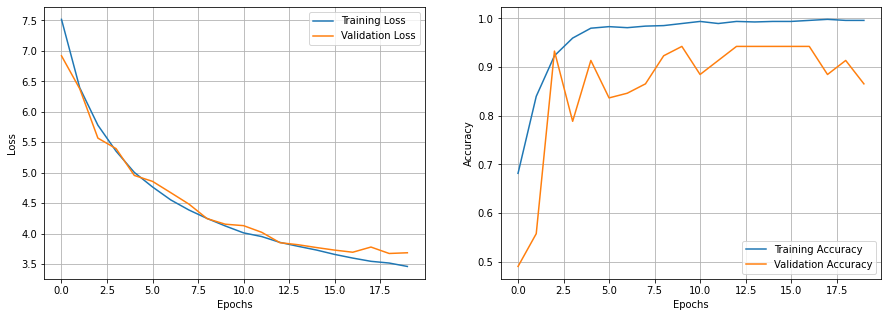

In [ ]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

# Testing Transfer Learning With EfficientNet  Performance

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
test_images = "images/test"

test_image_data = []
test_labels = []

test_folders = os.listdir(test_images)
print(test_folders)

label_dict = {
    'control':0,
    'pd':1
}

from keras.preprocessing import image

for ix in test_folders:
    path = os.path.join(test_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((512,512)))
        img_array = image.img_to_array(img)
        test_image_data.append(img_array)
        test_labels.append(label_dict[ix])
        

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:] = zip(*combined)

x_test = np.array(test_image_data)
y_test = np.array(test_labels)

from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test)

In [ ]:
model_efficient.evaluate(x_test,y_test)

4/4 [==============================] - 3s 762ms/step - loss: 3.4417 - accuracy: 0.9800


[3.441673994064331, 0.9800000190734863]

In [ ]:
predictions = model_efficient.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.96      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

